# ¿Qué vende un coche?

Cientos de anuncios gratuitos de vehículos se publican en un sitio web cada día. Vamos a estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

Vamos a cargar las librerías necesarias para poder procesar nuestros datos.

In [1]:
import pandas as pd

Vamos ahora a cargar la base datos a utilizar, en este caso es un CSV.

In [2]:
data = pd.read_csv('/datasets/vehicles_us.csv')

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [69]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Observando la información general de los datos podemos ver que hay datos faltantes en las columnas de 'model_year', 'cylinders', 'odomoter' y 'paint_color'. Algunas de estas se puede rellenar con valores promedios o medianas. Lo cuales veremos más adelante. 
Además, la columna de date_posted tiene formato object y debe ir con formato datetime.
A continuación, ajustamos la columna date_posted.

In [70]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


Cambiaremos los valores nulos de la columna de is_4wd por 0 para utilizarlo como valores booleanos.

In [71]:
data['is_4wd'] = data['is_4wd'].fillna(0)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


Ajustaremos la columna de is_4wd con números float a números enteros ya que estos deben ser enteros.

In [72]:
data['is_4wd'] = data['is_4wd'].astype(int)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


Listo, ya tenemos arreglada la columna de is_4wd

### Conclusiones y siguientes pasos

Los datos hasta ahora se ven normales para las columnas.

Se harán grupos para el año del modelo y el odómetro. Después, se buscarán los promedios y medianas del año del modelo y el odometro para rellenar los datos faltantes de estas columnas.

In [75]:
def model_year_group (model_year):
    if model_year <= 1980:
        return '1980 or less'
    elif model_year <= 1990:
        return '1981-1990'
    elif model_year <= 2000:
        return '1991-2000'
    elif model_year <= 2010:
        return '2001-2010'
    elif model_year <= 2020:
        return '2011-2020'
    
data['model_year_grouped'] = data['model_year'].apply(model_year_group)


def odometer_group (odometer):
    if odometer <= 50000:
        return '50,000 or less'
    elif odometer <= 100000:
        return '50,001 - 100,000'
    elif odometer <= 150000:
        return '100,001 - 150,000'
    elif odometer <= 200000:
        return '150,001 - 200,000'
    elif odometer <= 250000:
        return '200,001 - 250,000'
    elif odometer > 250000:
        return '250,000 or more'
    
data['odometer_grouped']=data['odometer'].apply(odometer_group)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_grouped,odometer_grouped
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,2011-2020,"100,001 - 150,000"
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,None,"50,001 - 100,000"
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2011-2020,"100,001 - 150,000"
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9,2001-2010,None
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2011-2020,"50,001 - 100,000"


Vamos a analizar la media y mediana de los valores en odometer agrupados por model_year.

In [76]:
data_pivot_mean = data.pivot_table(index='model_year_grouped', values='odometer')
data_pivot_mean

,odometer
model_year_grouped,
1980 or less,66666.565714
1981-1990,115529.748000
1991-2000,172993.704515
2001-2010,146911.236024
2011-2020,85032.839936


In [77]:
data_pivot_median = data.pivot_table(index='model_year_grouped', values='odometer', aggfunc='median')
data_pivot_median

,odometer
model_year_grouped,
1980 or less,60982.0
1981-1990,103991.5
1991-2000,173850.0
2001-2010,145000.0
2011-2020,82985.0


Utilizaremos la mediana para rellenar valores ausentes de odometer, ya que para algunos valores la mediana difiere mucho de la media.

In [78]:
def fill_odometer(row):
    model_year_grouped = row['model_year_grouped']
    odometer = row['odometer']
    
    if (pd.isna(odometer) == True) & (model_year_grouped == '1980 or less'):
        return data_pivot_median.loc['1980 or less','odometer']
    elif (pd.isna(odometer) == True) & (model_year_grouped == '1981-1990'):
        return data_pivot_median.loc['1981-1990','odometer']
    elif (pd.isna(odometer) == True) & (model_year_grouped == '1991-2000'):
        return data_pivot_median.loc['1991-2000','odometer']
    elif (pd.isna(odometer) == True) & (model_year_grouped == '2001-2010'):
        return data_pivot_median.loc['2001-2010','odometer']
    elif (pd.isna(odometer) == True) & (model_year_grouped == '2011-2020'):
        return data_pivot_median.loc['2011-2020','odometer']
    else:
        return odometer
    
data['odometer_new'] = data.apply(fill_odometer, axis=1)
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_grouped,odometer_grouped,odometer_new
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,2011-2020,"100,001 - 150,000",145000.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,None,"50,001 - 100,000",88705.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2011-2020,"100,001 - 150,000",110000.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9,2001-2010,None,145000.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2011-2020,"50,001 - 100,000",80903.0
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2011-2020,"50,001 - 100,000",57954.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,2011-2020,"50,001 - 100,000",79212.0
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,2011-2020,"100,001 - 150,000",109473.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1,2018-07-16,19,2011-2020,"100,001 - 150,000",104174.0
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,2001-2010,"100,001 - 150,000",147191.0


Ya rellenamos los valores ausentes de odometer en una nueva variable llamada odometer_new.
Ahora vamos a rellenar los valores ausentes de model_year.

In [79]:
data_pivot_model_year_mean = data.pivot_table(index='odometer_grouped', values='model_year')
data_pivot_model_year_mean

,model_year
odometer_grouped,
"100,001 - 150,000",2009.154217
"150,001 - 200,000",2006.646250
"200,001 - 250,000",2004.529614
"250,000 or more",2002.960703
"50,000 or less",2014.334834
"50,001 - 100,000",2011.662046


In [80]:
data_pivot_model_year_median = data.pivot_table(index='odometer_grouped', values='model_year', aggfunc='median')
data_pivot_model_year_median

,model_year
odometer_grouped,
"100,001 - 150,000",2010.0
"150,001 - 200,000",2007.0
"200,001 - 250,000",2005.0
"250,000 or more",2003.0
"50,000 or less",2016.0
"50,001 - 100,000",2013.0


Ahora vamos a rellenar los valores ausentes de model_year con los valores medianos.

In [81]:
def fill_model_year(row):
    odometer_grouped = row['odometer_grouped']
    model_year = row['model_year']
    
    if (pd.isna(model_year) == True) & (odometer_grouped == '100,001 - 150,000'):
        return data_pivot_model_year_median.loc['100,001 - 150,000','model_year']
    elif (pd.isna(model_year) == True) & (odometer_grouped == '150,001 - 200,000'):
        return data_pivot_model_year_median.loc['150,001 - 200,000','model_year']
    elif (pd.isna(model_year) == True) & (odometer_grouped == '200,001 - 250,000'):
        return data_pivot_model_year_median.loc['200,001 - 250,000','model_year']
    elif (pd.isna(model_year) == True) & (odometer_grouped == '250,000 or more'):
        return data_pivot_model_year_median.loc['250,000 or more','model_year']
    elif (pd.isna(model_year) == True) & (odometer_grouped == '50,000 or less'):
        return data_pivot_model_year_median.loc['50,000 or less','model_year']
    elif (pd.isna(model_year) == True) & (odometer_grouped == '50,001 - 100,000'):
        return data_pivot_model_year_median.loc['50,001 - 100,000','model_year']
    else:
        return model_year
    
data['model_year_new'] = data.apply(fill_model_year, axis=1)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_grouped,odometer_grouped,odometer_new,model_year_new
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,2011-2020,"100,001 - 150,000",145000.0,2011.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,None,"50,001 - 100,000",88705.0,2013.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2011-2020,"100,001 - 150,000",110000.0,2013.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9,2001-2010,None,145000.0,2003.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2011-2020,"50,001 - 100,000",80903.0,2017.0


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          47906 non-null  float64       
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           46265 non-null  float64       
 5   fuel                51525 non-null  object        
 6   odometer            43633 non-null  float64       
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         42258 non-null  object        
 10  is_4wd              51525 non-null  int64         
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  model_year_grouped  47906 non-null  object    

Confirmamos que hayan quedado los valores. Ahora vamos a ver los valores nulos de la columna cylinders y ver si se relaciona con alguna columna para tratar de sustituirlo con ellos.

In [83]:
data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,odometer_new,model_year_new
price,1.000000,0.428656,0.296627,-0.420299,0.315145,-0.000682,-0.414244,0.426636
model_year,0.428656,1.000000,-0.148040,-0.473948,0.043384,-0.005703,-0.484665,1.000000
cylinders,0.296627,-0.148040,1.000000,0.090160,0.405770,0.005517,0.090699,-0.145259
odometer,-0.420299,-0.473948,0.090160,1.000000,0.036267,0.003804,1.000000,-0.489344
is_4wd,0.315145,0.043384,0.405770,0.036267,1.000000,0.002003,0.032745,0.039740
days_listed,-0.000682,-0.005703,0.005517,0.003804,0.002003,1.000000,0.003568,-0.005467
odometer_new,-0.414244,-0.484665,0.090699,1.000000,0.032745,0.003568,1.000000,-0.497437
model_year_new,0.426636,1.000000,-0.145259,-0.489344,0.039740,-0.005467,-0.497437,1.000000


La columna de cylinders no se relaciona mucho con las otras variables más que con is_4wd pero aún así no lo suficiente, por lo que dejaremos esta variable así y vemos si podemos eliminar esas filas ya que solo representa el 8% de las filas.

In [84]:
data.dropna(subset=['odometer_new', 'model_year_new','cylinders' ],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45775 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               45775 non-null  int64         
 1   model_year          43009 non-null  float64       
 2   model               45775 non-null  object        
 3   condition           45775 non-null  object        
 4   cylinders           45775 non-null  float64       
 5   fuel                45775 non-null  object        
 6   odometer            39185 non-null  float64       
 7   transmission        45775 non-null  object        
 8   type                45775 non-null  object        
 9   paint_color         37546 non-null  object        
 10  is_4wd              45775 non-null  int64         
 11  date_posted         45775 non-null  datetime64[ns]
 12  days_listed         45775 non-null  int64         
 13  model_year_grouped  43009 non-null  object    

Los valores nulos de paint_color no los podemos reemplazar por lo que los dejaremos así.

## Corregir los tipos de datos

Ahora vamos a pasar los tipos de datos float de las nuevas columnas a int.

In [85]:
data['odometer_new']=data['odometer_new'].astype(int)
data['model_year_new']=data['model_year_new'].astype(int)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_grouped,odometer_grouped,odometer_new,model_year_new
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,2011-2020,"100,001 - 150,000",145000,2011
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,None,"50,001 - 100,000",88705,2013
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2011-2020,"100,001 - 150,000",110000,2013
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9,2001-2010,None,145000,2003
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2011-2020,"50,001 - 100,000",80903,2017


Revisamos si hay duplicados idénticos.

In [86]:
data.duplicated().sum()

0

No se encontraron duplicados idénticos.

Vamos a revisar si hay duplicados no implicitos.

In [87]:
data['fuel'].unique()

array(['gas', 'diesel', 'hybrid', 'other', 'electric'], dtype=object)

In [88]:
data['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [89]:
data['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'hatchback',
       'wagon', 'mini-van', 'convertible', 'other', 'bus', 'offroad'],
      dtype=object)

In [90]:
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

Estas columnas se ven bien, sin duplicados no implicitos.

## Enriquecer datos

Vamos a agregar columnas con la fecha en la que se publicó el anuncio.

In [91]:
data['year_posted']=pd.DatetimeIndex(data['date_posted']).year
data['month_posted']=pd.DatetimeIndex(data['date_posted']).month
data['day_of_week_posted']=pd.DatetimeIndex(data['date_posted']).dayofweek
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_grouped,odometer_grouped,odometer_new,model_year_new,year_posted,month_posted,day_of_week_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,2011-2020,"100,001 - 150,000",145000,2011,2018,6,5
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,None,"50,001 - 100,000",88705,2013,2018,10,4
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,2011-2020,"100,001 - 150,000",110000,2013,2019,2,3
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0,2019-03-22,9,2001-2010,None,145000,2003,2019,3,4
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,2011-2020,"50,001 - 100,000",80903,2017,2019,4,1


In [92]:
data['years_old'] = data['year_posted'] - data['model_year_new']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,model_year_grouped,odometer_grouped,odometer_new,model_year_new,year_posted,month_posted,day_of_week_posted,years_old
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,2018-06-23,19,2011-2020,"100,001 - 150,000",145000,2011,2018,6,5,7
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,None,"50,001 - 100,000",88705,2013,2018,10,4,5
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,2011-2020,"100,001 - 150,000",110000,2013,2019,2,3,6
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,...,2019-03-22,9,2001-2010,None,145000,2003,2019,3,4,16
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,2011-2020,"50,001 - 100,000",80903,2017,2019,4,1,2


In [93]:
data['avg_odometer_per_year'] = data['odometer_new']/data['years_old']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,model_year_grouped,odometer_grouped,odometer_new,model_year_new,year_posted,month_posted,day_of_week_posted,years_old,avg_odometer_per_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,19,2011-2020,"100,001 - 150,000",145000,2011,2018,6,5,7,20714.285714
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,50,None,"50,001 - 100,000",88705,2013,2018,10,4,5,17741.000000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,79,2011-2020,"100,001 - 150,000",110000,2013,2019,2,3,6,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,...,9,2001-2010,None,145000,2003,2019,3,4,16,9062.500000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,28,2011-2020,"50,001 - 100,000",80903,2017,2019,4,1,2,40451.500000


In [94]:
def condition_def(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    elif condition == 'salvage':
        return 0
    
data['condition_new'] = data['condition'].apply(condition_def)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,model_year_grouped,odometer_grouped,odometer_new,model_year_new,year_posted,month_posted,day_of_week_posted,years_old,avg_odometer_per_year,condition_new
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,2011-2020,"100,001 - 150,000",145000,2011,2018,6,5,7,20714.285714,2
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,None,"50,001 - 100,000",88705,2013,2018,10,4,5,17741.000000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,2011-2020,"100,001 - 150,000",110000,2013,2019,2,3,6,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,...,2001-2010,None,145000,2003,2019,3,4,16,9062.500000,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,2011-2020,"50,001 - 100,000",80903,2017,2019,4,1,2,40451.500000,3


## Comprobar datos limpios

Vamos a comprobar que los datos estén listos para el análisis tomando un vistazo general.

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45775 entries, 0 to 51524
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   price                  45775 non-null  int64         
 1   model_year             43009 non-null  float64       
 2   model                  45775 non-null  object        
 3   condition              45775 non-null  object        
 4   cylinders              45775 non-null  float64       
 5   fuel                   45775 non-null  object        
 6   odometer               39185 non-null  float64       
 7   transmission           45775 non-null  object        
 8   type                   45775 non-null  object        
 9   paint_color            37546 non-null  object        
 10  is_4wd                 45775 non-null  int64         
 11  date_posted            45775 non-null  datetime64[ns]
 12  days_listed            45775 non-null  int64         
 13  m

In [96]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,model_year_grouped,odometer_grouped,odometer_new,model_year_new,year_posted,month_posted,day_of_week_posted,years_old,avg_odometer_per_year,condition_new
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,2011-2020,"100,001 - 150,000",145000,2011,2018,6,5,7,20714.285714,2
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,None,"50,001 - 100,000",88705,2013,2018,10,4,5,17741.000000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,2011-2020,"100,001 - 150,000",110000,2013,2019,2,3,6,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,...,2001-2010,None,145000,2003,2019,3,4,16,9062.500000,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,2011-2020,"50,001 - 100,000",80903,2017,2019,4,1,2,40451.500000,3
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,...,2011-2020,"50,001 - 100,000",57954,2014,2018,6,2,4,14488.500000,3
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,...,2011-2020,"50,001 - 100,000",79212,2015,2018,12,3,3,26404.000000,3
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,...,2011-2020,"100,001 - 150,000",109473,2013,2019,1,0,6,18245.500000,3
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,...,2011-2020,"100,001 - 150,000",104174,2012,2018,7,0,6,17362.333333,3
10,19500,2011.0,chevrolet silverado 1500,excellent,8.0,gas,128413.0,automatic,pickup,black,...,2011-2020,"100,001 - 150,000",128413,2011,2018,9,0,7,18344.714286,3


## Estudiar parámetros principales

Vamos a analizar las algunas variables de la base de datos para ver sus valores atípicos.

Las variables son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

Vamos a definir una función que nos ayude a hacer este proceso más rápido.

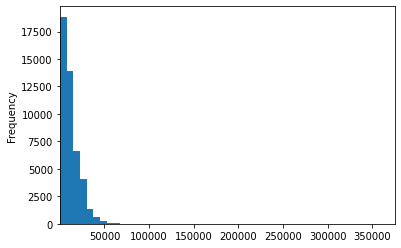

In [97]:
def histograma(variable, numbins, xlim1, xlim2):
    data[variable].plot(kind='hist', bins=numbins, xlim=(data[xlim1].min(),data[xlim2].max()))
    
histograma('price', 50,'price','price')

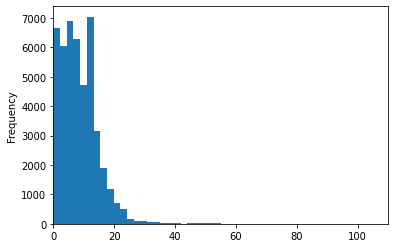

In [98]:
histograma('years_old', 50,'years_old','years_old')

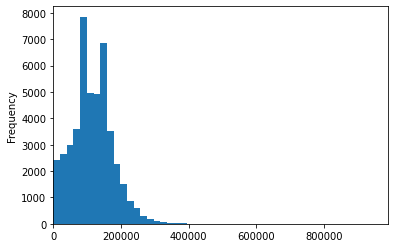

In [99]:
histograma('odometer_new', 50,'odometer_new','odometer_new')

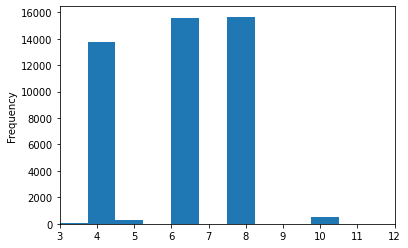

In [100]:
histograma('cylinders', 12,'cylinders','cylinders')


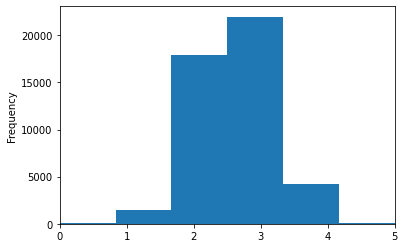

In [101]:
histograma('condition_new', 6,'condition_new','condition_new')


## Estudiar y tratar valores atípicos

Los histogramas anteriores nos dieron una idea de cuales son los valores atípicos en esas variables, por lo que vamos a pasar a filtrar esos valores atípicos para tener una muestra más acertada.

In [111]:
data_filtered = data.query('price > 200 & cylinders > 3 & odometer_new >100')


In [115]:
data_filtered = data_filtered.query('price < 55000 & cylinders <= 8 & years_old <=40 & odometer_new <=400000')

## Estudiar parámetros principales sin valores atípicos

Con estos nuevos datos filtrados, vamos a ver si los histogramas tienen una distribución más equitativa.

<AxesSubplot:ylabel='Frequency'>

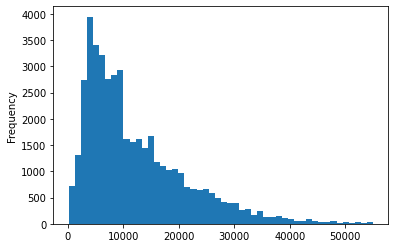

In [116]:
data_filtered['price'].plot(kind='hist', bins=50)

Correcto, los histogramas tienen una mejor distribución.

## Periodo de colocación de los anuncios

Vamos a ver cual es la media y la mediana de días de anuncio activos, y ver si se relaciona con alguna otra variable.

In [129]:
print('Media de días por anuncio activo:') 
print(data_filtered['days_listed'].mean())
print('Mediana de días por anuncio activo:') 
print(data_filtered['days_listed'].median())

Media de días por anuncio activo:
39.55307465395961
Mediana de días por anuncio activo:
33.0


In [128]:
data_filtered.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,odometer_new,model_year_new,year_posted,month_posted,day_of_week_posted,years_old,avg_odometer_per_year,condition_new
price,1.000000,0.568890,0.343576,-0.509633,0.368057,-0.001252,-0.503579,0.563349,0.006462,-0.003441,-0.002549,-0.561732,0.297406,0.245110
model_year,0.568890,1.000000,-0.161686,-0.550394,0.018304,-0.003062,-0.566345,1.000000,0.017705,-0.016435,-0.003862,-0.996768,0.536683,0.294864
cylinders,0.343576,-0.161686,1.000000,0.122505,0.409186,0.004277,0.122068,-0.159100,-0.001284,0.002416,-0.006623,0.158687,-0.048857,-0.073076
odometer,-0.509633,-0.550394,0.122505,1.000000,0.046977,0.005505,1.000000,-0.564603,-0.009522,0.013182,0.006427,0.562826,0.085687,-0.301418
is_4wd,0.368057,0.018304,0.409186,0.046977,1.000000,0.006763,0.042795,0.015143,-0.000987,0.003839,0.003370,-0.015194,0.046465,0.007336
days_listed,-0.001252,-0.003062,0.004277,0.005505,0.006763,1.000000,0.005034,-0.003248,0.011237,-0.010750,0.001440,0.004163,-0.003127,-0.003417
odometer_new,-0.503579,-0.566345,0.122068,1.000000,0.042795,0.005034,1.000000,-0.577655,-0.008652,0.012210,0.005294,0.575831,0.023870,-0.293060
model_year_new,0.563349,1.000000,-0.159100,-0.564603,0.015143,-0.003248,-0.577655,1.000000,0.017462,-0.016071,-0.003276,-0.996638,0.520482,0.292458
year_posted,0.006462,0.017705,-0.001284,-0.009522,-0.000987,0.011237,-0.008652,0.017462,1.000000,-0.817813,-0.009206,0.064515,-0.113158,0.004118
month_posted,-0.003441,-0.016435,0.002416,0.013182,0.003839,-0.010750,0.012210,-0.016071,-0.817813,1.000000,0.007771,-0.050975,0.097982,-0.000946


Los anuncios se encuentran activos en un promedio de 33 días. Sin embargo, no se relacionan con alguna otra variable de los datos que tenemos.

## Precio promedio por cada tipo de vehículo

Vamos a analizar el promedio de precio y el número de anuncios por tipo de vehiculo. Con esto, determinaremos qué tipos de vehículos tienen el mayor número de anuncios.

In [136]:
data_filtered_pivot = data_filtered.pivot_table(index='type', values='price',aggfunc=['mean','count'])
data_filtered_pivot.columns=['price_mean','count']
data_filtered_pivot

,price_mean,count
type,,
SUV,11323.162815,10730
bus,6139.285714,7
convertible,13193.835165,364
coupe,14254.793651,1890
hatchback,6875.744921,886
mini-van,8079.843719,1011
offroad,14564.684492,187
other,11322.457547,212
pickup,16061.980299,6091


<AxesSubplot:xlabel='type'>

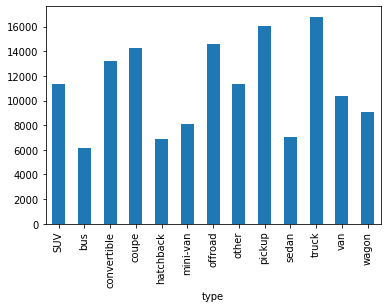

In [142]:
data_filtered_pivot['price_mean'].plot(kind='bar')

<AxesSubplot:xlabel='type'>

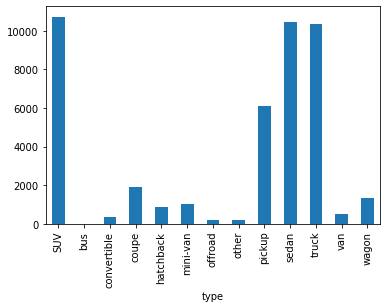

In [141]:
data_filtered_pivot['count'].plot(kind='bar')

Los tipos 'truck' y 'pickup' tienen los promedios de precio más altos de todos los vehículos.
Sin embargo, 'SUV' tiene el mayor número de anuncios, seguido por 'sedan'.

## Factores de precio

Vamos a analizar que variables tienen más impacto sobre el precio de los autos SUV y sedan.
Para las variables númericas utilizaremos el gráfico de dispersión y para las categóricas utilizaremos gráficos de barras.

In [152]:
data_filtered_type = data_filtered.query('type == "SUV" | type == "sedan"')
data_filtered_type.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,odometer_new,model_year_new,year_posted,month_posted,day_of_week_posted,years_old,avg_odometer_per_year,condition_new
price,1.000000,0.584110,0.205400,-0.532399,0.301070,-0.003393,-0.526245,0.578466,0.015313,-0.011231,0.001403,-0.575507,0.294872,0.274507
model_year,0.584110,1.000000,-0.256904,-0.617661,-0.099575,-0.008907,-0.632209,1.000000,0.016155,-0.016666,-0.001982,-0.995871,0.547797,0.323837
cylinders,0.205400,-0.256904,1.000000,0.213665,0.416935,0.014604,0.215937,-0.253772,0.004724,-0.001500,-0.005196,0.253533,-0.118089,-0.073407
odometer,-0.532399,-0.617661,0.213665,1.000000,0.072234,0.014385,1.000000,-0.631292,-0.011117,0.014523,0.007163,0.628554,0.033755,-0.339156
is_4wd,0.301070,-0.099575,0.416935,0.072234,1.000000,0.007600,0.075475,-0.099392,0.001448,0.001823,0.004572,0.099261,-0.030305,-0.012324
days_listed,-0.003393,-0.008907,0.014604,0.014385,0.007600,1.000000,0.012514,-0.010227,0.003981,-0.005592,-0.000697,0.010568,-0.009762,-0.016305
odometer_new,-0.526245,-0.632209,0.215937,1.000000,0.075475,0.012514,1.000000,-0.642839,-0.010540,0.014329,0.005923,0.640150,-0.025241,-0.326498
model_year_new,0.578466,1.000000,-0.253772,-0.631292,-0.099392,-0.010227,-0.642839,1.000000,0.017521,-0.018192,-0.001370,-0.995712,0.530848,0.322954
year_posted,0.015313,0.016155,0.004724,-0.011117,0.001448,0.003981,-0.010540,0.017521,1.000000,-0.817683,-0.012180,0.075044,-0.118329,0.003067
month_posted,-0.011231,-0.016666,-0.001500,0.014523,0.001823,-0.005592,0.014329,-0.018192,-0.817683,1.000000,0.013017,-0.057508,0.100225,-0.001623


<AxesSubplot:xlabel='years_old', ylabel='price'>

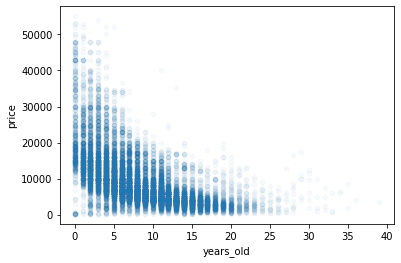

In [157]:
data_filtered_type.plot.scatter(x = 'years_old', y = 'price', alpha=.03)

Para la variable de edad del auto, encontramos que el precio va disminuyendo conforme la edad sea mayor.

<AxesSubplot:xlabel='odometer_new', ylabel='price'>

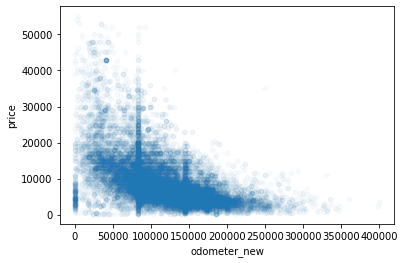

In [158]:
data_filtered_type.plot.scatter(x = 'odometer_new', y = 'price', alpha=.03)

Para la variable de millaje, encontramos que el precio disminuye conforme el millaje es mayor.

<AxesSubplot:xlabel='condition_new', ylabel='price'>

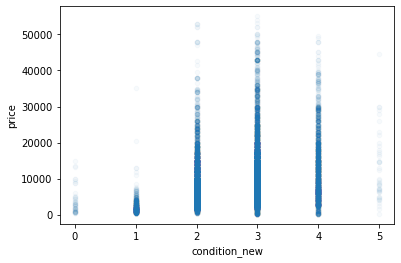

In [159]:
data_filtered_type.plot.scatter(x = 'condition_new', y = 'price', alpha=.03)

Para la variable de condición, sí hay una correlación entre el precio y condición del auto, sin embargo, esta correlación no es tan fuerte como las anteriores.

<AxesSubplot:xlabel='transmission'>

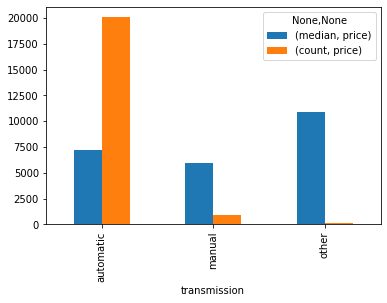

In [173]:
data_filtered_type.pivot_table(index='transmission', values='price', aggfunc=['median', 'count']).plot(kind='bar')

En promedio, los autos con transmisión automática tienen un costo un poco más elevado que los manuales. Sin embargo, la transmisión 'otra' tiene un costo más elevado pero con una muestra de datos muy baja.

<AxesSubplot:xlabel='paint_color'>

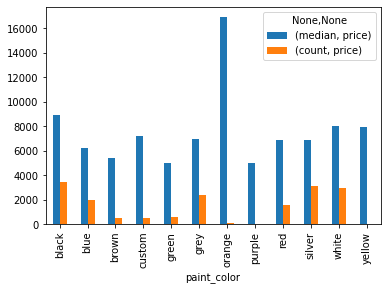

In [172]:
data_filtered_type.pivot_table(index='paint_color', values='price', aggfunc=['median', 'count']).plot(kind='bar')

En promedio, el costo de los autos naranjas suele ser el más elevado de los colores, seguido por el color negro. Sin embargo, la muestra de los autos naranjas es muy baja.

## Conclusión general


En un inicio pudimos ver que hay datos faltantes en las columnas de 'model_year', 'cylinders', 'odomoter' y 'paint_color'. Algunas de estas las rellenamos con la media dependiendo de otras varibles. Además, la columna de date_posted fue ajustada a un formato datetime.

Ajustamos la columna de is_4wd ya que tenía valores de 1 y NaN. Sin embargo el NaN debía ser 0 porque era una variable con datos booleanos.

La columna de cylinders no se relaciona con las otras variables más que con is_4wd pero aún así, no lo suficiente, por lo que dejaremos esta variable así y eliminaremos esas filas ya que solo representa el 8% de las filas.

Se revisó si había datos duplicados pero no se encontraron duplicados.

Agregamos nuevas columnas tomando datos de la fecha para poder tener el año del auto. Después, se calculó la edad del auto y se asignó a una nueva variable. También, se calculó el promedio de millaje por cada año de uso del auto y se asignó a una nueva variable.

Transformamos la variable catégotica de condition a variable númerica para poder hacer análisis más adelante.

Se comenzó a hacer una análisis para ver valores atípicos en las variables y determinamos los mínimos y máximos para cada una de esas variables, resultando en un dataframe filtrado.

Finalmente se hicieron análisis para determinar el precio promedio y el número de anuncios por cada tipo de vehículo.

Determinamos que los SUVs y los sedan, eran los que más anuncios tenían, por lo que seguimos a realizar un análisis más profundo solamente con este tipo de autos y determinamos lo siguiente:
- Para la variable de edad del auto, encontramos que el precio va disminuyendo conforme la edad sea mayor.
- Para la variable de millaje, encontramos que el precio disminuye conforme el millaje es mayor.
- Para la variable de condición, sí hay una correlación entre el precio y condición del auto, sin embargo, esta correlación no es tan fuerte como las anteriores.
- En promedio, los autos con transmisión automática tienen un costo un poco más elevado que los manuales. Sin embargo, la transmisión 'otra' tiene un costo más elevado pero con una muestra de datos muy baja.
- En promedio, el costo de los autos naranjas suele ser el más elevado de los colores, seguido por el color negro. Sin embargo, la muestra de los autos naranjas es muy baja.